#### We want to get insights about our clients base like their needs, which groups should marketing campaigns be focused on, what preferences these groups have, how to engage new clients and so on.

## **Cutsomer Segmentation:**
### is the process of diving customers into groups based on common characteristics.Segmentation allows marketers to better tailor their marking efforts to various audience subsets.

#### Segmentation helps a company:


* It create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others.
* Select the best communication channel for the segment. eg: email, social media posts, etc
* Identify ways to improve products, new products or service opportunities.
* Establish better customer relationships.
* Test pricing options.
* Improve customer cross-sell

#### We understands that every customer has its specific needs and we believe that marketing efforts would be better served if they target specific, smaller groups with relevent messages. We also want to gain a deeper understanding of our customer's preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials towards that segment.



### **Dataset Variables**


*   CustomerID : Unique ID assigned to the customer.
*   Gender
*   Age
*   Annual Income (R$) : Annual income of the customer.
*   Spending score (1-100) : score assigned on the customer based on behavior and spending nature.



### Load Libraries


In [21]:
pip install numpy pandas scikit-learn matplotlib seaborn kaggle


Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
#import kaggle


## **Exploratory Data Analysis**

In [23]:
# Load the dataset
df = pd.read_csv('customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- From the data info we see that our data has zero null values
- The data types are int or object

In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From the data summary statistics we see that:

- Our customers have an average age of **39** years.
- The olderest customer is **70** years while the youngest is **18** years old.
- The average annual salary of our customes is 61K.
- The customer annual salary ranges from 15K to 137K.

In [26]:
# checking the missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### **Features Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

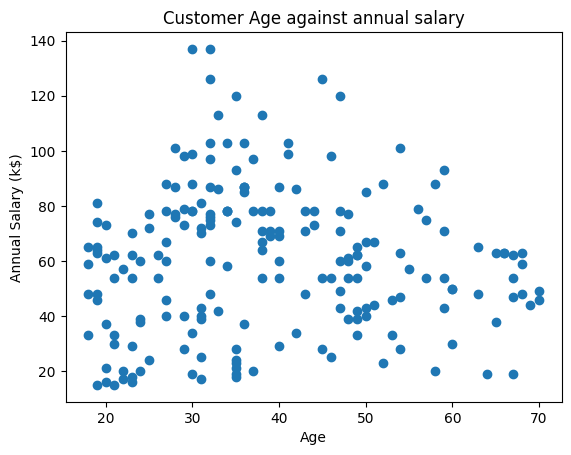

In [27]:
x=df["Age"]
y=df["Annual Income (k$)"]
plt.title("Customer Age against annual salary")
plt.xlabel("Age")
plt.ylabel("Annual Salary (k$)")
plt.scatter(x,y)
plt.show

In [28]:
cust_above_100 =df[df["Annual Income (k$)"] > 120]
print(f"The are {len(cust_above_100)} customers earning above 120K")
print(f"The age range for this earning is {cust_above_100['Age'].min()}-{cust_above_100['Age'].max()}")

The are 4 customers earning above 120K
The age range for this earning is 30-45


- The annual salary across the customer ages is very sparce with no clear evident trend but the highest earning customer lay in the age range of 30 to 45.
- This makes sens as that is the prime age of the typical working class of people.

<function matplotlib.pyplot.show(close=None, block=None)>

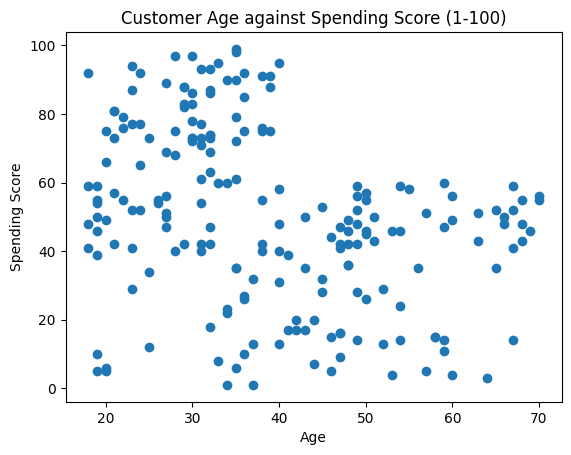

In [29]:
x=df["Age"]
y=df["Spending Score (1-100)"]
plt.title("Customer Age against Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.scatter(x,y)
plt.show

In [30]:
cust_above_100 =df[df["Spending Score (1-100)"] > 80]
print(f"The are {len(cust_above_100)} customers spending over 80")
print(f"The age range for this spending score is {cust_above_100['Age'].min()}-{cust_above_100['Age'].max()}")


The are 30 customers spending over 80
The age range for this spending score is 18-40


- The customers with a 80% and above spending score are in the age range of 18 to 40
- This support a theory that young and working class people tend to spend more than older people.

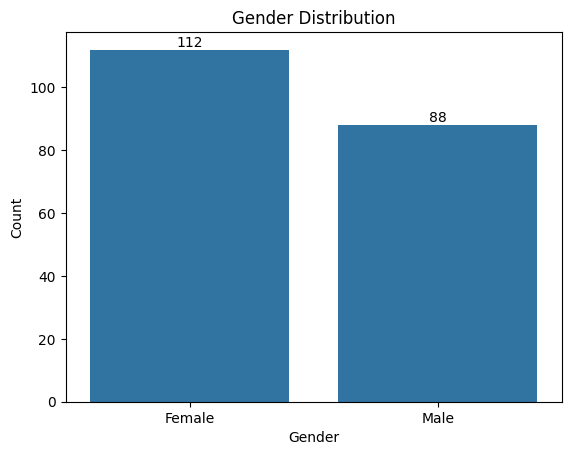

In [31]:
gender_counts = df['Genre'].value_counts()

sns.barplot(x=gender_counts.index, y=gender_counts.values)

for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
    
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

## Customer Base Clustering



## **K-means Algorithm**

#### a.k.a naive k-means is a unsupervised learning technique that consists of cluster similar data based on eucludean distance of each data point or observations to its closest cluster centroid.

### **Determining the optimal number of clusters**
#### How do we choose the number *k* of clusters?


* We could set k to an arbitrary value ( eg for the set of cloth items we could cluster them into 3 groups by their sizes: Big, Medium and small )
* when k is not given by the business logic, we use the value search method ( **Elbow or Silhouette method** ).


#### **Elbow Method :**
it plots the inertia of a clustering for several values of k >>> it uses the Scikit-Learn library to create the cluster and retrieves the inertia of the clustering.




In [32]:
# Replacing Age values to be numeric because k-means algorthm takes only numeric values ( "Male" = 0, "Female" = 1)

df["Genre"] = df["Genre"].replace(
    {"Male": 0, "Female": 1}
)

C:\Users\pmatsane\AppData\Local\Temp\ipykernel_30252\4277880014.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Genre"] = df["Genre"].replace(


In [33]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [34]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to return the inertia for a clustering
def get_clustering_inertia(k, data):
    kmeans = KMeans(n_clusters=k, algorithm ="elkan", n_init =100, max_iter = 100, random_state =42).fit(data)
    return kmeans.inertia_

In [35]:
inertia_values = [
    get_clustering_inertia(k=k, data=df.iloc[:, 1:]) for k in range(1, 11)
]

c:\Users\pmatsane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


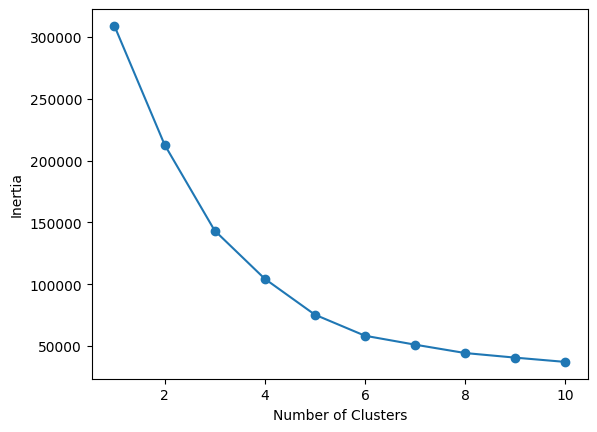

In [36]:
# plotting the inertia values
plt.plot(range(1, 11), inertia_values, "o-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

The K value is 5

## **Clustering Visualization**

### PCA (Principal Component Analysis) - is a statistical technique that decompose a multivariate dataset in a set of principal components ( successive orthogonal components that explains the data's variance).

The Purpose of PCA in Clustering:


* **Dimensionality reduction** - it reduces the number of variable in a dataset while preserving as much information as possible.It helps in reducing the number of features to a smaller set of principal components that explain most of the variance in the data.
* **Improving Clustering Performance** - K means algorithm can perform poorly with a high dimentional data, PCA reduces the noise and focuses on the most important variations in the data, which can lead to better clustering results.
* **Hnadling Correlated Features** - PCA can handle multicollinearity.



In [37]:
# Compute the optimal clustering
Optimal_model = KMeans(n_clusters=5, algorithm ="lloyd", n_init =100, max_iter = 100, random_state =42).fit(df.iloc[:, 1:])

cluster_labels = Optimal_model.predict(df.iloc[:, 1:])


In [38]:
# fit a sklearn's PCA transformer and project the data to the reduced space
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state = 42).fit(df.iloc[:, 1:])
df_reduced = pca.fit_transform(df.iloc[:, 1:])

C:\Users\pmatsane\AppData\Local\Temp\ipykernel_30252\3607020757.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(


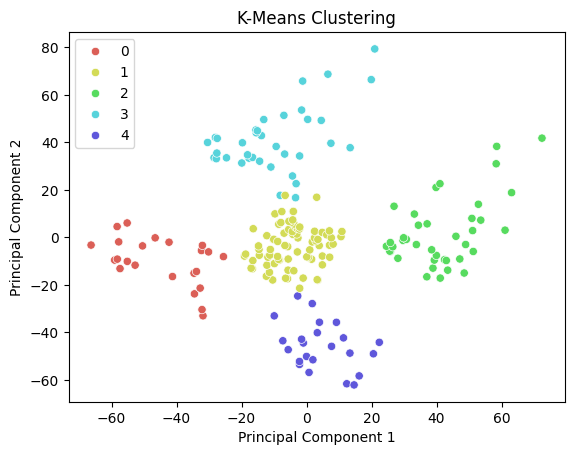

In [39]:
# visualising the clustering results using sns
sns.scatterplot(
    x=df_reduced[:, 0],
    y=df_reduced[:, 1],
    hue=cluster_labels,
    palette=sns.color_palette("hls", 6),
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering")
plt.show()


In [40]:
# When we not supply n_components, the pricipal components are computed
# for the full feature space
pca_full = PCA( random_state = 42).fit(df.iloc[:, 1:])
df_reduced = pca_full.fit_transform(df.iloc[:, 1:])


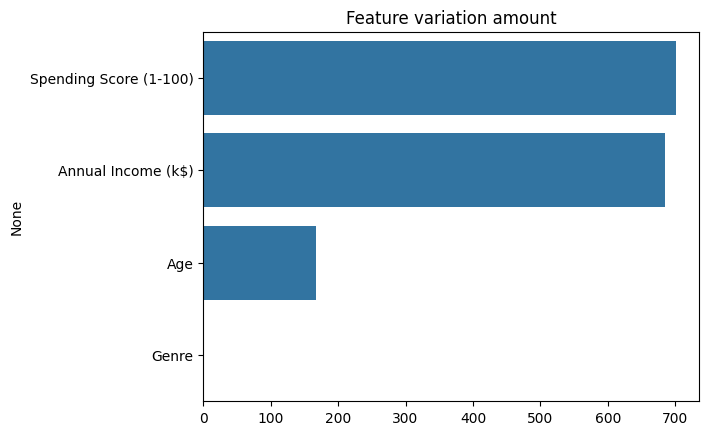

In [41]:
component_order = pca_full.explained_variance_.argsort()
var_sorted_columns = df.iloc[:, 1:].columns[component_order]
var_sorted_columns

ax = sns.barplot(y=var_sorted_columns, x=pca_full.explained_variance_)
plt.title("Feature variation amount");

Spending Score and Annual Income are the features that holds most of the information in dataset.

C:\Users\pmatsane\AppData\Local\Temp\ipykernel_30252\4245645393.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.scatterplot(


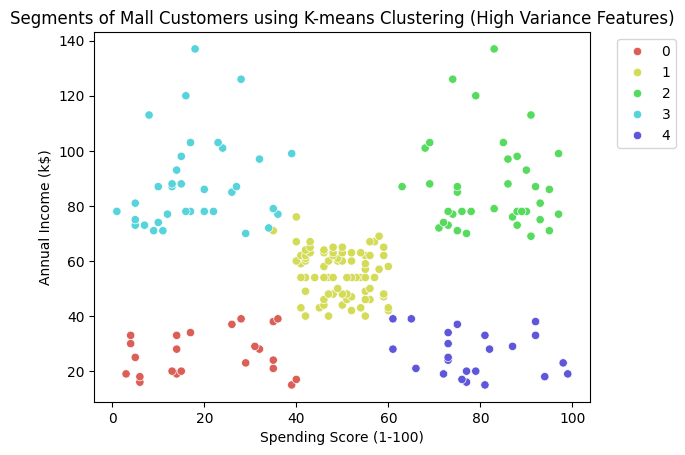

In [42]:
#cmap = matplotlib.colormaps["Spectral"]
ax = sns.scatterplot(
    x=var_sorted_columns[0],   # X-axis variable (first variable in var_sorted_columns)
    y=var_sorted_columns[1],   # Y-axis variable (Second variable in var_sorted_columns)
    data=df,                   # Data source
    hue=cluster_labels,
    palette=sns.color_palette("hls", 6),        # Color-coding by cluster labels

)
ax.set_title(
    "Segments of Mall Customers using K-means Clustering (High Variance Features)"
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

#### The clustering methodology successfully isolate 5 groups:

*  **Group 1 (red):** represents customers with high Annual Income and high Spending Score.
* **Group 2 (light blue):** represents customers with high Annual Income and low Spending Score.
* **Group 3 (Yellow):** represents low Annual Income and low Spending Score.
* **Group 4 (Dark blue):** represents low Annual Income and high Spending Score.
* **Group 5 (Green):** represents medium Annual Income and medium Spending Score.






In [43]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
